<a href="https://colab.research.google.com/github/Arpiii2209/AirQualityMadrid/blob/main/3_An%C3%A1lisis_predictivo_de_la_calidad_del_aire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

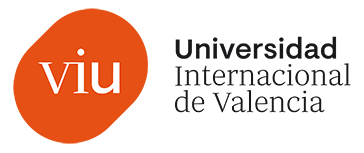

# **Análisis espacial de la calidad del aire en la Comunidad de Madrid**

## **Análisis predictivo**

##### Autor: Arpita Jiménez Morán

A partir del archivo '*1. Extracción y transformación los datos de calidad del aire.ipynb*', donde se llevó a cabo el proceso de extracción y transformación de los datos, del cual disponemos, se ha creado el archivo **database_restructured.csv**. En este notebook se realizará el análisis predictivo de los datos.

Se procederá a seleccionar la estación 24 (Casa de Campo) ya que es la estación con mayor cantidad de información disponible.

Donde se llevará a cabo un análisis de los siguientes algoritmos de predicción: Regresión Lineal, Bosques Aleatorios (Random Forest) y k-Vecinos Más Cercanos (KNN). Este análisis nos permitirá predecir los niveles de contaminación de NO2, NO3 y PM10 en la estación seleccionada, utilizando diferentes modelos de aprendizaje automático, y evaluar la efectividad de cada modelo en términos de precisión y rendimiento predictivo.

<a name="indice"></a>
## **Índice**

0. [Preliminares](#Preliminares)
1. [Selección de los datos](#Selección)
2. [Exploración inicial de los datos](#Exploración)
3. [Transformación de los datos](#Transformación)
4. [Selección y exploración de los datos transformados](#Selección)
5. [Análisis predictivo para la estación 24 (Casa de Campo)](#Estación24)
    1. [Exploración de los datos transformados](#DatosTrans)
    2. [Inicialización de variables y partición de los datos](#Inicialización)
    3. [Análisis de regresión por algoritmos](#AnalisisRE)
      1. [Métricas de evaluación de los algoritmos](#Métricas)
      2. [Lineal Regression](#Regresión)
      3. [Random Forest](#Random)
      4. [K-Nearest Neighbors - KNN](#KNN)
      5. [Resultados de los algoritmos para cada magnitud
](#Resultados)
    5. [Análisis de clasificación por algoritmos](#AnalisisCL)
      1. [Métricas de evaluación de los algoritmos](#Métricas2)
      2. [Transformación para algoritmos de clasificación](#Métricas21)
      2. [Inicialización de variables y partición de los datos](#Métricas22)
      3. [Random Forest](#RandomCL)
      4. [K-Nearest Neighbors - KNN](#KNNCL)











<a name="Preliminares"></a>
## **Preliminares**
([Índice](#indice))

La ejecución de esta parte inicial de código nos permite acceder a los archivos y datos almacenados en Google Drive directamente desde el Notebook de Google Colab.

Se monta Google Drive en Colab para acceder a los archivos y directorios como si estuvieran almacenados localmente en la máquina virtual.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Se establece el directorio raíz donde se encuentran los archivos y datos del proyecto.

In [3]:
BASE_FOLDER='/content/gdrive/MyDrive/TFM - Calidad del aire en la Comunidad de Madrid'

Se agrega el directorio a la lista de rutas donde Python buscará al intentar importar librerías en caso de necesitarlo.

In [4]:
import sys

In [5]:
sys.path.append(BASE_FOLDER)

Ahora sí, el entorno está preparado para importar las librerías que se encuentran en este directorio en caso de necesitarlo.

<a name="Selección"></a>
## **Selección de los datos**
([Índice](#indice))

In [6]:
# Librerías
import pandas as pd
import os
import matplotlib.pyplot as plt

In [7]:
# Read csv from generated file
data_folder = os.path.join(BASE_FOLDER, "data")
transformed_data_folder = os.path.join(data_folder, 'transformed')
database_restructured_path = os.path.join(transformed_data_folder, 'database_restructured.csv')

database_restructured_df = pd.read_csv(database_restructured_path)
display(database_restructured_df)

,ESTACION,ANO,MES,DIA,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,SO2,TCH,TOL
0,4,2001,1,1,NaN,NaN,0.8,NaN,NaN,45.0,58.0,127.0,NaN,NaN,NaN,17.0,NaN,NaN
1,4,2001,1,2,NaN,NaN,0.5,NaN,NaN,12.0,60.0,78.0,NaN,NaN,NaN,15.0,NaN,NaN
2,4,2001,1,3,NaN,NaN,0.6,NaN,NaN,32.0,65.0,114.0,NaN,NaN,NaN,15.0,NaN,NaN
3,4,2001,1,4,NaN,NaN,0.5,NaN,NaN,29.0,63.0,108.0,NaN,NaN,NaN,15.0,NaN,NaN
4,4,2001,1,5,NaN,NaN,1.0,NaN,NaN,91.0,57.0,197.0,NaN,NaN,NaN,16.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201595,60,2023,12,27,NaN,NaN,NaN,NaN,NaN,50.0,60.0,137.0,19.0,23.0,NaN,NaN,NaN,NaN
201596,60,2023,12,28,NaN,NaN,NaN,NaN,NaN,67.0,59.0,163.0,19.0,30.0,NaN,NaN,NaN,NaN
201597,60,2023,12,29,NaN,NaN,NaN,NaN,NaN,68.0,60.0,164.0,15.0,28.0,NaN,NaN,NaN,NaN
201598,60,2023,12,30,NaN,NaN,NaN,NaN,NaN,33.0,49.0,99.0,21.0,18.0,NaN,NaN,NaN,NaN


<a name="Exploraciónp"></a>
## **Exploración previa de los datos transformados**
([Índice](#indice))

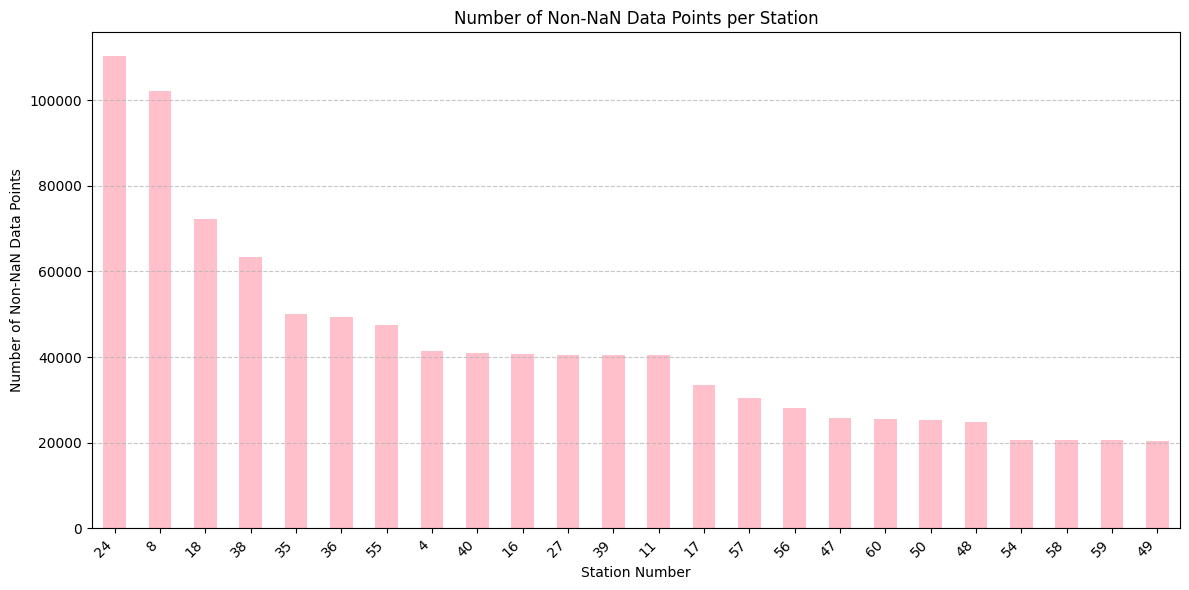

In [8]:
# Filter the DataFrame to include only rows where at least one column is not NaN
non_nan_data = database_restructured_df.dropna(subset=database_restructured_df.columns[4:], how='all')

# Count the number of non-NaN data points per station
data_count_by_station = non_nan_data.groupby('ESTACION').count().iloc[:, 3:]

# Calculate the sum of non-NaN data points per station
data_sum_by_station = data_count_by_station.sum(axis=1)

# Sort the stations by the amount of non-NaN data in descending order
data_sum_by_station = data_sum_by_station.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
data_sum_by_station.plot(kind='bar', color='pink')
plt.title('Number of Non-NaN Data Points per Station')
plt.xlabel('Station Number')
plt.ylabel('Number of Non-NaN Data Points')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En el análisis descriptivo de los datos, se destaca que la estación 24 sobresale por su extenso historial de datos tanto en términos de calendario, abarcando desde el año 2001 hasta el 2023, como en el estudio de diversas magnitudes. Esta situación otorga a la estación 24 una relevancia particular en el análisis predictivo debido a la disponibilidad de datos históricos completos y extensos.

Esta característica otorga a la estación 24 una relevancia especial en el análisis predictivo. La abundancia de datos históricos completos y extensos que ofrece esta estación resulta fundamental para el entrenamiento de modelos con mayor precisión y la obtención de resultados más fiables.




In [9]:
n_station = 24
station_n_restructured_df = database_restructured_df.loc[database_restructured_df['ESTACION'] == n_station]

display(station_n_restructured_df)

,ESTACION,ANO,MES,DIA,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,SO2,TCH,TOL
50400,24,2001,1,1,0.4,1.30,0.7,NaN,0.13,15.0,31.0,54.0,25.0,15.0,NaN,10.0,1.43,4.9
50401,24,2001,1,2,0.2,1.24,0.5,NaN,0.08,2.0,13.0,16.0,45.0,8.0,NaN,8.0,1.31,1.2
50402,24,2001,1,3,0.3,1.25,0.6,NaN,0.09,3.0,26.0,31.0,31.0,12.0,NaN,9.0,1.34,2.9
50403,24,2001,1,4,0.3,1.25,0.6,NaN,0.08,3.0,21.0,26.0,35.0,12.0,NaN,8.0,1.33,2.3
50404,24,2001,1,5,0.5,1.31,0.6,NaN,0.13,16.0,39.0,64.0,13.0,17.0,NaN,11.0,1.45,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58795,24,2023,12,27,1.2,NaN,NaN,0.3,NaN,43.0,47.0,112.0,5.0,31.0,24.0,NaN,NaN,5.0
58796,24,2023,12,28,1.3,NaN,NaN,0.4,NaN,52.0,51.0,130.0,2.0,34.0,25.0,NaN,NaN,5.4
58797,24,2023,12,29,1.6,NaN,NaN,0.6,NaN,62.0,44.0,139.0,1.0,37.0,28.0,NaN,NaN,6.7
58798,24,2023,12,30,0.9,NaN,NaN,0.2,NaN,18.0,37.0,65.0,11.0,22.0,18.0,NaN,NaN,2.7


<a name="Estación24"></a>
## **Análisis predictivo para la estación 24 (Casa de Campo)**
([Índice](#indice))

La razón de elegir tanto modelos de regresión como de clasificación en nuestro análisis se basa en la naturaleza de las variables que estamos tratando y los diferentes objetivos que queremos alcanzar. Este TFM trabaja con datos que representan mediciones continuas, como la cantidad de contaminantes en el aire, y también puede incluir variables categóricas que nos interesan clasificar.

*   Los modelos de regresión son ideales para predecir variables continuas, como las concentraciones de contaminantes en el aire. Nos permiten obtener estimaciones precisas de estos valores, facilitando el análisis y la toma de decisiones al trabajar con datos que varían de forma continua.

*   Los modelos de clasificación son útiles para trabajar con variables categóricas. En nuestro caso, además de las mediciones continuas, queremos clasificar los días según los niveles de contaminación en categorías como "muy buena", "buena", "mala" y "muy mala". Esto nos ayuda a entender patrones y tomar decisiones informadas basadas en categorías claras y definidas.

In [10]:
# Librerías
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

Antes de realizar el análisis predictivo, es importante verificar cuántos valores 'NaN' hay en el conjunto de datos. Esto ayuda a comprender la completitud de los datos y asegura la integridad del análisis.

Tras analizarlo, se procede a eliminar las filas con valores 'NaN' para garantizar que no haya información dispar en el modelo y mantener su integridad.








In [11]:
# Calculate the number of NaN values per column
nan_distribution = station_n_restructured_df.isna().sum()
print(nan_distribution)

ESTACION       0
ANO            0
MES            0
DIA            0
BEN          273
CH4         1064
CO          1064
EBE          454
NMHC        1064
NO             0
NO2            0
NOx            0
O3             0
PM10           0
PM2.5        913
SO2         1064
TCH         1064
TOL          273
dtype: int64


In [12]:
# Delete rows with Nan values
station_n_restructured_df = station_n_restructured_df.dropna(how='any')
station_n_restructured_df = station_n_restructured_df.reset_index(drop=True)
display(station_n_restructured_df)

,ESTACION,ANO,MES,DIA,BEN,CH4,CO,EBE,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,SO2,TCH,TOL
0,24,2003,1,1,0.6,1.21,0.4,0.4,0.09,2.0,14.0,18.0,39.0,9.0,7.0,4.0,1.30,0.9
1,24,2003,1,2,0.7,1.21,0.4,0.5,0.10,3.0,23.0,28.0,30.0,6.0,5.0,4.0,1.31,2.2
2,24,2003,1,3,0.5,1.20,0.5,0.6,0.10,3.0,18.0,22.0,42.0,10.0,5.0,4.0,1.29,1.3
3,24,2003,1,4,0.6,1.22,0.6,0.5,0.11,3.0,20.0,24.0,37.0,13.0,5.0,4.0,1.32,1.3
4,24,2003,1,5,1.4,1.27,0.6,0.9,0.15,16.0,37.0,62.0,16.0,16.0,7.0,4.0,1.42,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,24,2021,1,27,0.2,0.00,0.0,0.1,0.00,5.0,13.0,21.0,27.0,7.0,5.0,0.0,0.00,0.8
6146,24,2021,1,28,0.3,0.00,0.0,0.1,0.00,3.0,13.0,17.0,20.0,8.0,6.0,0.0,0.00,0.9
6147,24,2021,1,29,0.3,0.00,0.0,0.1,0.00,2.0,11.0,14.0,25.0,9.0,7.0,0.0,0.00,0.5
6148,24,2021,1,30,0.2,0.00,0.0,0.1,0.00,1.0,2.0,4.0,57.0,6.0,4.0,0.0,0.00,0.1


<a name="DatosTrans"></a>
### **Exploración de los datos transformados**
([Índice](#indice))

Para empezar, se definen las columnas que serán parte del análisis predictivo.

In [13]:
# Define the columns of interest
columns_of_interest = ['BEN', 'CH4', 'CO', 'EBE', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5', 'SO2', 'TCH', 'TOL']

La matriz de correlación de Pearson se utiliza para medir la relación lineal entre variables continuas. A partir de un mapa de calor, nos ayuda a entender si hay una asociación entre las variables, así como su fuerza y dirección. Es útil para seleccionar variables relevantes en modelos predictivos lineales y para explorar la estructura de los datos.

El coeficiente de correlación de Pearson oscila entre -1 y 1. Un valor cercano a 1 indica una correlación positiva perfecta, lo que significa que, a medida que una variable aumenta, la otra también tiende a aumentar. Por otro lado, un valor cercano a -1 indica una correlación negativa perfecta, donde al aumentar una variable, la otra tiende a disminuir.

Finalmente, cuando el coeficiente de correlación está cercano a 0, la correlación es nula, lo que sugiere que no hay una relación lineal entre las variables.

Esta medida es útil para identificar la fuerza y la dirección de las asociaciones entre las variables, lo que puede ser importante para comprender la estructura de los datos y para seleccionar las variables más relevantes en un modelo predictivo.



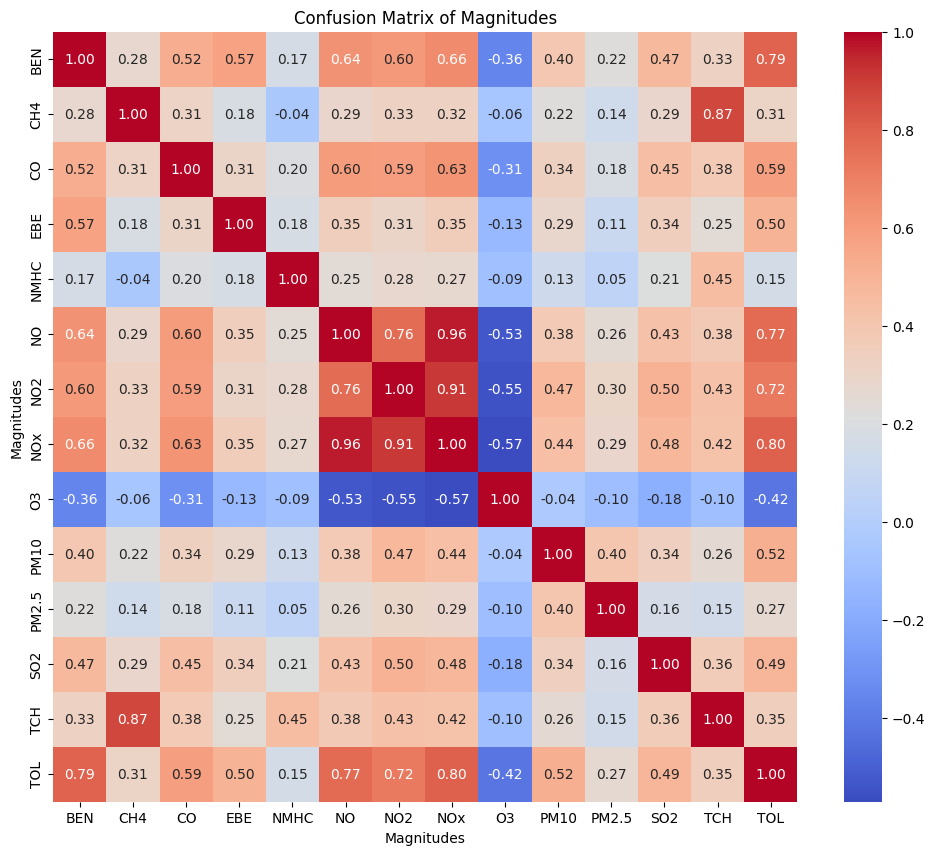

In [14]:
# Create a correlation matrix
correlation_matrix = station_n_restructured_df[columns_of_interest].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Confusion Matrix of Magnitudes')
plt.xlabel('Magnitudes')
plt.ylabel('Magnitudes')
plt.show()

Además de la correlación de Pearson, también se procede a utilizar la correlación de Spearman para analizar la relación entre variables.

A diferencia de la correlación de Pearson, la correlación de Spearman no asume una relación lineal entre las variables, lo que la hace útil para detectar relaciones no lineales.

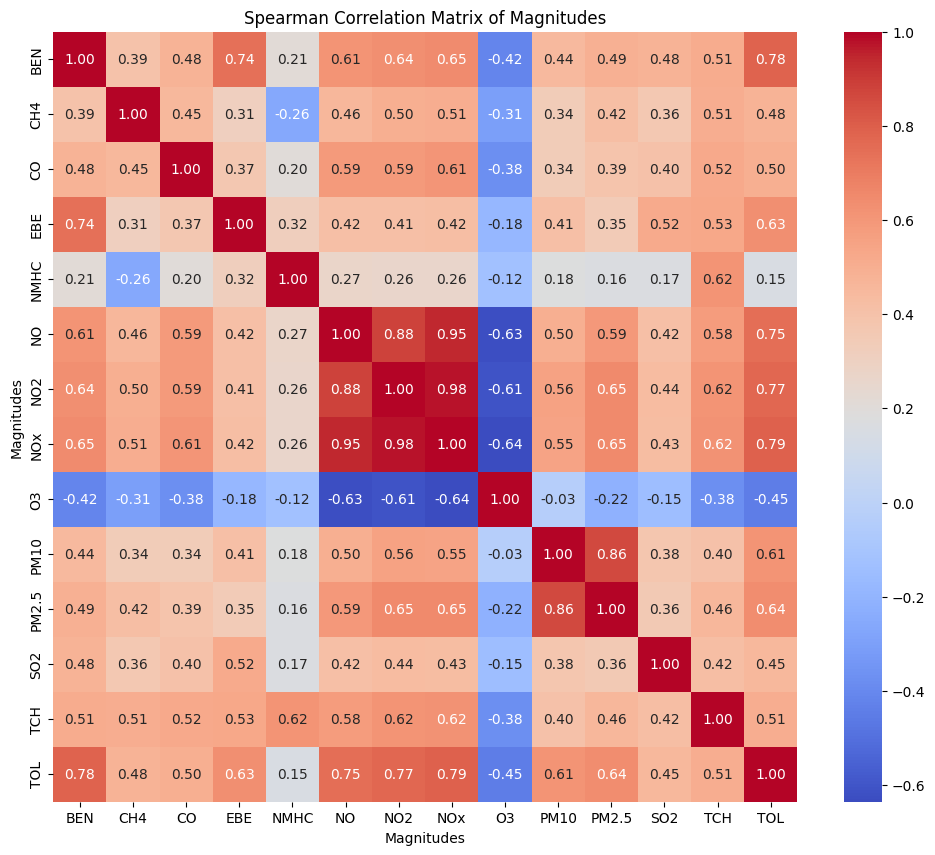

In [15]:
# Create a Spearman correlation matrix
spearman_correlation_matrix = station_n_restructured_df[columns_of_interest].corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Magnitudes')
plt.xlabel('Magnitudes')
plt.ylabel('Magnitudes')
plt.show()

Al visualizar ambas matrices, se observa que la correlación de Spearman puede proporcionar una mejor comprensión de la relación entre las variables en comparación con la correlación de Pearson.

Esto sugiere que la correlación de Spearman, al ser más adecuada para capturar relaciones no lineales, puede ofrecer una representación más precisa de la asociación entre las variables en este conjunto de datos.


<a name="Inicialización"></a>
### **Inicialización de variables y partición de los datos**
([Índice](#indice))

Se inicializan las variables para estudiar cada contaminante, en relación a los siguientes algoritmos:

*   Regresión Lineal (este solo se va a usar en regresión)
*   Random Forest (regresión y clasificación)
*   K-Nearest Neighbors - KNN (regresión y clasificación)

In [16]:
# target variable to predict
target = 'PM10'

In [17]:
# Separate the features (X) and the target variable (y)
X = station_n_restructured_df[columns_of_interest].drop(columns=[target])
y = station_n_restructured_df[target]

In [18]:
# Divide the data set into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a name="AnalisisRE"></a>
### **Análisis de regresión por algoritmos**
([Índice](#indice))


<a name="Métricas"></a>
#### **Métricas de evaluación de los algoritmos de regresión**
([Índice](#indice))

*  El coeficiente de determinación 𝑅2 es una medida que indica qué tan bien se ajustan las predicciones del modelo a los datos reales. Su valor oscila entre 0 y 1, donde 1 significa un ajuste perfecto y 0 significa que el modelo no está haciendo ninguna predicción mejor que simplemente usar la media de los datos.
*  Error Absoluto Medio (MAE): Es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales.

*  Error Cuadrático Medio (MSE): Es la media de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales.

*  Error Cuadrático Medio de la Raíz (RMSE): Es simplemente la raíz cuadrada del MSE.


<a name="Regresión"></a>
#### **Lineal Regression**
([Índice](#indice))


La regresión lineal es un algoritmo utilizado para analizar la relación entre dos variables, donde una variable (llamada variable dependiente) se predice en función de una o más variables independientes. Este método es ideal para cuando queremos entender como cambia una variable dependiente a medida que varáina las variables independientes.

La idea principal detrás de la regresión lineal es encontrar la mejor línea recta que se ajuste a los datos, de modo que minimice la distancia entre los puntos de datos reales y los puntos predichos por la línea recta.

In [20]:
# Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R2
r2LR = r2_score(y_test, y_pred)
print("R2 Score:", r2LR)

# Calculate mean absolute error (MAE)
maeLR = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", maeLR)

# Calculate mean squared error (MSE)
mseLR = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mseLR)

# Calculate Root Mean Squared Error (RMSE)
rmseLR = np.sqrt(mseLR)
print("Root Mean Squared Error (RMSE):", rmseLR)

R2 Score: 0.5424560389409385
Mean Absolute Error (MAE): 6.033202026159283
Mean Squared Error (MSE): 76.50154868212053
Root Mean Squared Error (RMSE): 8.746516374084058


<a name="Random"></a>
#### **Random forest**
([Índice](#indice))

Random Forest es un algoritmo de aprendizaje automático que combina múltiples árboles de decisión para realizar predicciones más precisas y robustas en problemas de regresión.. Cada árbol en el bosque se entrena de manera independiente con un subconjunto aleatorio de características y datos de entrenamiento.

El número de árboles en el bosque, llamado "n_estimators", es un parámetro que se puede ajustar. Se elige 100 como valor común porque proporciona un buen equilibrio entre precisión y eficiencia computacional. Es importante destacar que un mayor número de árboles puede mejorar la precisión, pero también aumenta el costo computacional.

In [21]:
# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R2 score
r2RF = r2_score(y_test, y_pred)
print("R2 Score:", r2RF)

# Calculate Mean Absolute Error (MAE)
maeRF = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", maeRF)

# Calculate Mean Squared Error (MSE)
mseRF = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mseRF)

# Calculate Root Mean Squared Error (RMSE)
rmseRF = np.sqrt(mseRF)
print("Root Mean Squared Error (RMSE):", rmseRF)

R2 Score: 0.8673492655067607
Mean Absolute Error (MAE): 3.1922764227642277
Mean Squared Error (MSE): 22.179260325203252
Root Mean Squared Error (RMSE): 4.709486206074209


<a name="KNN"></a>
#### **K-Nearest Neighbors - KNN**
([Índice](#indice))

KNN (k-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para problemas de regresión. A diferencia de los modelos lineales, KNN no asume ninguna estructura específica en los datos y puede capturar relaciones no lineales entre las variables.

El método del codo es una técnica utilizada para determinar el valor óptimo del parámetro \( k \) en KNN. Se prueban diferentes valores de \( k \) y se evalúa el rendimiento del modelo para cada uno de ellos. Se calcula una métrica de evaluación, como el error cuadrático medio (MSE) o el error absoluto medio (MAE), para cada valor de \( k \).Donde luegoo se traza una curva de validación que muestra cómo varía la métrica de evaluación con respecto a \( k \).


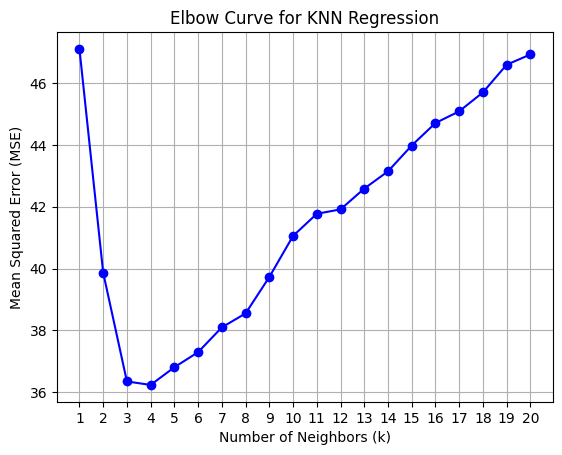

Optimal k: 4
R2 Score with optimal k: 0.7832453981525184
Mean Absolute Error (MAE) with optimal k: 4.113414634146341
Mean Squared Error (MSE) with optimal k: 36.24146341463415
Root Mean Squared Error (RMSE) with optimal k: 6.0200883228266795


In [22]:
# Initialize variables to store errors and k values
errors = []
k_values = range(1, 21)  # Test k values from 1 to 20

# Train and evaluate poKNN models for each k value
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

# Plot the elbow curve to find the optimal k value
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KNN Regression')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Using the optimal k (elbow point), train and evaluate the final model
optimal_k = k_values[np.argmin(errors)]
knn_model_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_model_optimal.predict(X_test_scaled)

# Print the optimal k value
print("Optimal k:", optimal_k)

# Calculate R2 score
r2_optimal = r2_score(y_test, y_pred_optimal)
print("R2 Score with optimal k:", r2_optimal)

# Calculate Mean Absolute Error (MAE)
mae_optimal = mean_absolute_error(y_test, y_pred_optimal)
print("Mean Absolute Error (MAE) with optimal k:", mae_optimal)

# Calculate Mean Squared Error (MSE)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
print("Mean Squared Error (MSE) with optimal k:", mse_optimal)

# Calculate Root Mean Squared Error (RMSE)
rmse_optimal = np.sqrt(mse_optimal)
print("Root Mean Squared Error (RMSE) with optimal k:", rmse_optimal)

In [23]:
# Train the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)  # You can adjust the number of neighbors (k) as needed
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate R2 score
r2KNN = r2_score(y_test, y_pred)
print("R2 Score:", r2KNN)

# Calculate Mean Absolute Error (MAE)
maeKNN = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", maeKNN)

# Calculate Mean Squared Error (MSE)
mseKNN = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mseKNN)

# Calculate Root Mean Squared Error (RMSE)
rmseKNN = np.sqrt(mseKNN)
print("Root Mean Squared Error (RMSE):", rmseKNN)

R2 Score: 0.7832453981525184
Mean Absolute Error (MAE): 4.113414634146341
Mean Squared Error (MSE): 36.24146341463415
Root Mean Squared Error (RMSE): 6.0200883228266795


<a name="Resultados"></a>
#### **Resultados de los algoritmos para cada magnitud**
([Índice](#indice))



El código posterior se encarga de imprimir una comparativa de cada métrica de cada algoritmo para una magnitud en especial.

In [24]:
max_model_length = max(len("Lineal Regression"), len("Random Forest"), len("k-Nearest Neighbors"))

print(f"The magnitude of study is: {target}\n")
print(f"{'Lineal Regression':<{max_model_length}} -> {'R2 Score':<5}: {r2LR},  {'MAE':<5}: {maeLR:.2f},  {'MSE':<5}: {mseLR:.2f},  {'RMSE':<5}: {rmseLR:.2f}")
print(f"{'Random Forest':<{max_model_length}} -> {'R2 Score':<5}: {r2RF},  {'MAE':<5}: {maeRF:.2f},  {'MSE':<5}: {mseRF:.2f},  {'RMSE':<5}: {rmseRF:.2f}")
print(f"{'k-Nearest Neighbors':<{max_model_length}} -> {'R2 Score':<5}: {r2KNN},  {'MAE':<5}: {maeKNN:.2f},  {'MSE':<5}: {mseKNN:.2f},  {'RMSE':<5}: {rmseKNN:.2f}")

The magnitude of study is: PM10

Lineal Regression   -> R2 Score: 0.5424560389409385,  MAE  : 6.03,  MSE  : 76.50,  RMSE : 8.75
Random Forest       -> R2 Score: 0.8673492655067607,  MAE  : 3.19,  MSE  : 22.18,  RMSE : 4.71
k-Nearest Neighbors -> R2 Score: 0.7832453981525184,  MAE  : 4.11,  MSE  : 36.24,  RMSE : 6.02


<a name="AnalisisCL"></a>
### **Análisis de clasificación por algoritmos**
([Índice](#indice))


<a name="Métricas2"></a>
#### **Métricas de evaluación de los algoritmos**
([Índice](#indice))

*   La matriz de confusión proporciona una tabla que resume el desempeño del modelo clasificando ejemplos en clases correctas e incorrectas. Los valores en la matriz representan el número de predicciones correctas e incorrectas para cada clase.
*   Reporte de Clasificación:


    *   Precisión (Precision): Mide la proporción de verdaderos positivos entre los ejemplos que el modelo predijo como positivos. Es útil para entender la exactitud de las predicciones positivas.
    *   Recall (Sensibilidad o Tasa de Verdaderos Positivos): Mide la proporción de verdaderos positivos entre todos los ejemplos que son realmente positivos. Es importante para evaluar la capacidad del modelo para identificar correctamente todas las instancias positivas.
    *   F1-Score: Es la media armónica entre la precisión y el recall. Proporciona una única métrica que equilibra tanto la precisión como el recall, especialmente útil cuando se tiene un conjunto de datos desbalanceado.
    *   Soporte (Support): Indica el número de ocurrencias de cada clase en el conjunto de datos real. Es importante para contextualizar las métricas anteriores.

*   Exactitud (Accuracy): Mide la proporción de predicciones correctas entre el total de predicciones. Aunque es una métrica comúnmente utilizada, puede ser engañosa en conjuntos de datos desbalanceados.


<a name="Métricas21"></a>
#### **Transformación para algoritmos de clasificación**
([Índice](#indice))

In [25]:
# Define values with label
def categorize_magnitude(value, magnitude):
    if magnitude == "PM2.5":
        if value <= 15:
            return 'Very Good'
        elif 16 <= value <= 30:
            return 'Good'
        elif 31 <= value <= 55:
            return 'Bad'
        elif 56 <= value <= 110:
            return 'Very Bad'
        else:
            return 'Extremely Bad'
    elif magnitude == "PM10":
        if value <= 25:
            return 'Very Good'
        elif 26 <= value <= 50:
            return 'Good'
        elif 51 <= value <= 90:
            return 'Bad'
        elif 91 <= value <= 180:
            return 'Very Bad'
        else:
            return 'Extremely Bad'
    elif magnitude == "NO2":
        if value <= 50:
            return 'Very Good'
        elif 51 <= value <= 100:
            return 'Good'
        elif 101 <= value <= 200:
            return 'Bad'
        elif 201 <= value <= 400:
            return 'Very Bad'
        else:
            return 'Extremely Bad'
    elif magnitude == "O3":
        if value <= 60:
            return 'Very Good'
        elif 61 <= value <= 120:
            return 'Good'
        elif 121 <= value <= 180:
            return 'Bad'
        elif 181 <= value <= 240:
            return 'Very Bad'
        else:
            return 'Extremely Bad'
    elif magnitude == "SO2":
        if value <= 50:
            return 'Very Good'
        elif 51 <= value <= 100:
            return 'Good'
        elif 101 <= value <= 350:
            return 'Bad'
        elif 351 <= value <= 500:
            return 'Very Bad'
        else:
            return 'Extremely Bad'
    else:
        return 'Unknown'

# Select magnitude to categorize
magnitude_name = "PM10"

# Categorize pollutant values to obtain air quality
station_n_restructured_df['air_quality'] = station_n_restructured_df[magnitude_name].apply(lambda x: categorize_magnitude(x, magnitude_name))

<a name="Métricas22"></a>
#### **Inicialización de variables y partición de los datos**
([Índice](#indice))

In [26]:
# Now 'y' should be the 'air_quality' column
y = station_n_restructured_df['air_quality']

# Divide the data set into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a name="RandomCL"></a>
#### **Random forest**
([Índice](#indice))

Random Forest es un algoritmo de aprendizaje automático que utiliza múltiples árboles de decisión para clasificar la calidad del aire en categorías como "Muy Bueno", "Bueno", "Malo" y "Muy Malo". Cada árbol se entrena de manera independiente con un subconjunto aleatorio de características y datos de entrenamiento.

El número de árboles en el bosque, conocido como "n_estimators", se ajusta para equilibrar precisión y eficiencia computacional. Se suele elegir un valor de alrededor de 100 debido a su eficacia en esta tarea. Random Forest es capaz de capturar relaciones complejas entre las variables de entrada y las clases objetivo, proporcionando una clasificación precisa de la calidad del aire.

In [28]:
# Create and train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nPrecisión del modelo:", accuracy_score(y_test, y_pred))


Matriz de confusión:
 [[ 15  16   1]
 [  6 240  54]
 [  0  46 852]]

Reporte de clasificación:
               precision    recall  f1-score   support

         Bad       0.71      0.47      0.57        32
        Good       0.79      0.80      0.80       300
   Very Good       0.94      0.95      0.94       898

    accuracy                           0.90      1230
   macro avg       0.82      0.74      0.77      1230
weighted avg       0.90      0.90      0.90      1230


Precisión del modelo: 0.9


<a name="KNNCL"></a>
#### **K-Nearest Neighbors - KNN**
([Índice](#indice))

KNN (k-Nearest Neighbors) es un algoritmo de aprendizaje supervisado utilizado para problemas de regresión. A diferencia de los modelos lineales, KNN no asume ninguna estructura específica en los datos y puede capturar relaciones no lineales entre las variables.

El método del codo es una técnica utilizada para determinar el valor óptimo del parámetro \( k \) en KNN. Se prueban diferentes valores de \( k \) y se evalúa el rendimiento del modelo para cada uno de ellos. Se calcula una métrica de evaluación, como el error cuadrático medio (MSE) o el error absoluto medio (MAE), para cada valor de \( k \).Donde luegoo se traza una curva de validación que muestra cómo varía la métrica de evaluación con respecto a \( k \).


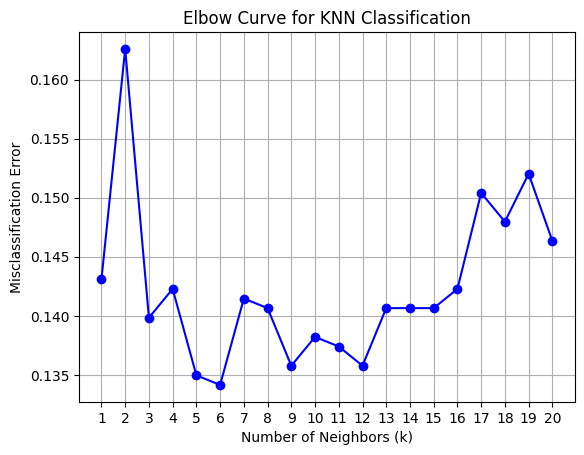

Optimal k: 6

Evaluation Report with Optimal k:
              precision    recall  f1-score   support

         Bad       0.54      0.47      0.50        32
        Good       0.71      0.71      0.71       300
   Very Good       0.92      0.92      0.92       898

    accuracy                           0.86      1230
   macro avg       0.72      0.70      0.71      1230
weighted avg       0.86      0.86      0.86      1230


Model Accuracy with Optimal k: 0.8577235772357723


In [29]:
# Initialize variables to store errors and k values
errors = []
k_values = range(1, 21)  # Test k values from 1 to 20

# Train and evaluate KNN models for each k value
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    y_pred = knn_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    errors.append(1 - accuracy)  # Misclassification error (1 - accuracy)

# Plot the elbow curve to find the optimal k value
plt.plot(k_values, errors, marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for KNN Classification')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassification Error')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Using the optimal k (elbow point), train and evaluate the final model
optimal_k1 = k_values[np.argmin(errors)]
knn_model_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model_optimal.fit(X_train_scaled, y_train)
y_pred_optimal = knn_model_optimal.predict(X_test_scaled)

# Print the optimal k value
print("Optimal k:", optimal_k1)

# Evaluate the model with optimal k
print("\nEvaluation Report with Optimal k:")
print(classification_report(y_test, y_pred_optimal, zero_division=0))

# Calculate model accuracy with optimal k
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
print("\nModel Accuracy with Optimal k:", accuracy_optimal)

In [30]:
# Create and train the KNN model (make sure 'optimal_k' is defined)
model = KNeighborsClassifier(n_neighbors=optimal_k1)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 11  19   2]
 [ 10 213  77]
 [  1  56 841]]

Classification Report:
               precision    recall  f1-score   support

         Bad       0.50      0.34      0.41        32
        Good       0.74      0.71      0.72       300
   Very Good       0.91      0.94      0.93       898

    accuracy                           0.87      1230
   macro avg       0.72      0.66      0.69      1230
weighted avg       0.86      0.87      0.86      1230


Model Accuracy: 0.8658536585365854
